Dataset do Kaggle:50 Startups

# Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import model_selection, linear_model, metrics

In [2]:
data_raw = pd.read_csv('50_Startups.csv')
data_raw.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Verificando dados inconsistentes

In [ ]:
data_raw.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
data_raw.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data_raw.duplicated().sum()

0

In [ ]:
data_raw['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Como não localizamos valores inconsistentes, atribuiremos ao formato definitivo do DataFrame

In [3]:
df = data_raw

# Exploração dos dados

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.shape

(50, 5)

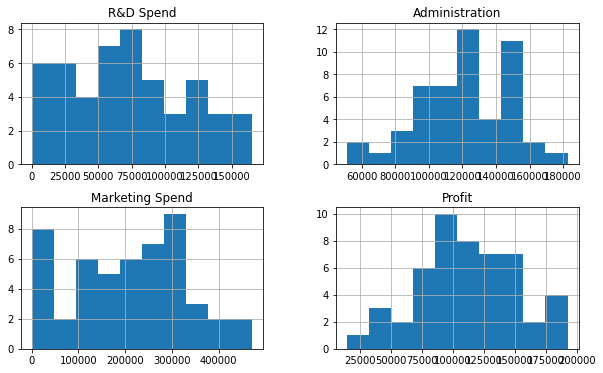

In [ ]:
df.hist(figsize=(10,6));

Há uma boa distribuição entre as colunas não categoricas, agora verificaremos a coluna categorica

In [ ]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

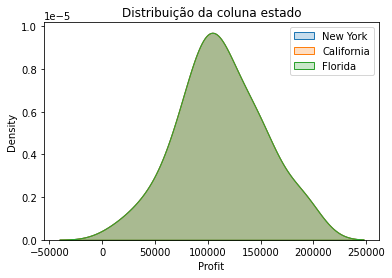

In [ ]:
sns.kdeplot(data=df['Profit'], label='New York', shade=True)
sns.kdeplot(data=df['Profit'], label='California', shade=True)
sns.kdeplot(data=df['Profit'], label='Florida', shade=True)
plt.title('Distribuição da coluna estado')
plt.legend();

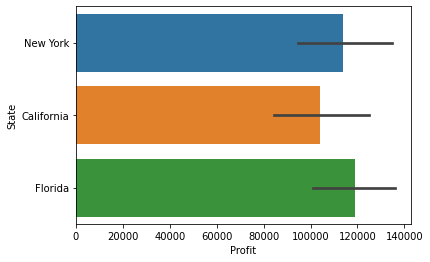

In [ ]:
sns.barplot(x=df['Profit'], y=df['State'])

Como verificamos atraves do gráfico de distribuição o estado da Florida sobrepôs os outros estados, já no gráfico de barras podemos confirmar que o estado da Florida é o maior valor detre eles, mas a distribuição dos estados esta de acordo

In [ ]:
df['State'] = df['State'].replace({'New York':0, 'California':1, 'Florida':2})
np.unique(df['State'], return_counts=True)

(array([0, 1, 2]), array([17, 17, 16]))

Efetuamos a transformação dos dados acima para verificar sua correlação com a coluna que iremos efetuar a regressão que é a Profit(Lucro)

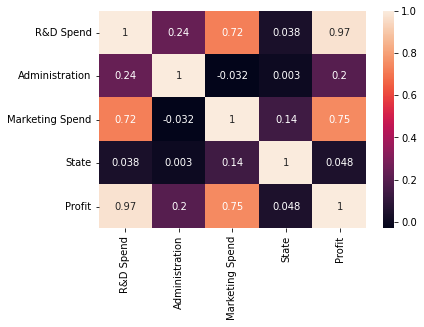

In [ ]:
sns.heatmap(df.corr(), annot=True);

Conforme o mapa de calor iremos efetuar a regressão da coluna Profit com as colunas R&D Spend e Marketing Spend, pois os outros valores estão abaixo de 0.7 então não criariam uma bom algoritmo gerando overfit

In [ ]:
ms = math.pow(0.72, 2)
rd = math.pow(0.97, 2)
print(f'Marketing Spend coeficiente: {ms}')
print(f'R&D Spend coeficiente: {rd}')

Marketing Spend coeficiente: 0.5184
R&D Spend coeficiente: 0.9409


Os coeficientes das colunas selecionadas estão acima de 0.3

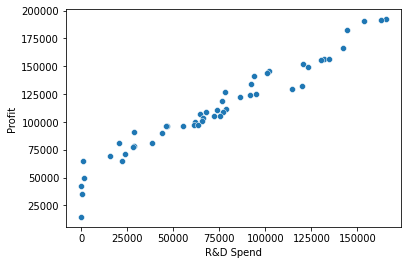

In [ ]:
sns.scatterplot(x=df['R&D Spend'], y=df['Profit'])

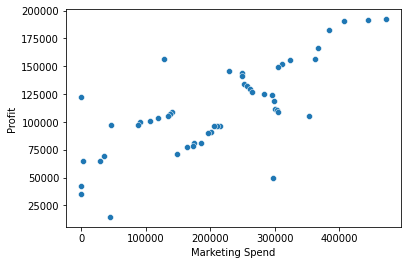

In [ ]:
sns.scatterplot(x=df['Marketing Spend'], y=df['Profit'])

Conforme verificado as duas colunas selecionadas para a regressão possuem uma Linearidade

# Treinando o modelo

In [4]:
x = df.iloc[:, [0, 2]].values
x.shape

(50, 2)

In [5]:
y = df.iloc[:, 4].values
y.shape

(50,)

Selecionamos as colunas para a regressão

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [7]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
regressor.score(x_train, y_train)

0.9423713608840597

In [18]:
regressor.score(x_test, y_test)

0.9646437135748333

In [8]:
#b1 (coeficiente)
print(f'Coefficients:{regressor.coef_}')
#b0 (constante)
print(f'Intercept:{regressor.intercept_}')

Coefficients:[0.7712254  0.03033984]
Intercept:48591.08663115169


In [11]:
previsao = regressor.predict(x_test)
previsao

array([114917.8413704 ,  90313.64099254,  76009.75011789,  69813.57462438,
       179305.74763886, 171560.97370364,  49009.12936176, 102438.26124395,
        58620.00921091,  98417.54338576])

# Métricas de erro

In [12]:
# Mean Absolute Erro
metrics.mean_absolute_error(y_test, previsao)

7763.928749546978

In [14]:
# Root Mean Squared Erro
math.sqrt(metrics.mean_squared_error(y_test, previsao))

8956.401768319904

In [15]:
# R2 Score
metrics.r2_score(y_test, previsao)

0.9646437135748333

O R2 Score demonstra que nossa previsao esta bem ajustada aos dados reais de teste